## 3.2 Interest Rate Simulation under fBm

#### 3.2.1 Vasicek and CIR model

Simulation w.r.t. fBm-Driven Vasicek and CIR Model: Impact of Hurst Parameter

In [3]:
from utils import *

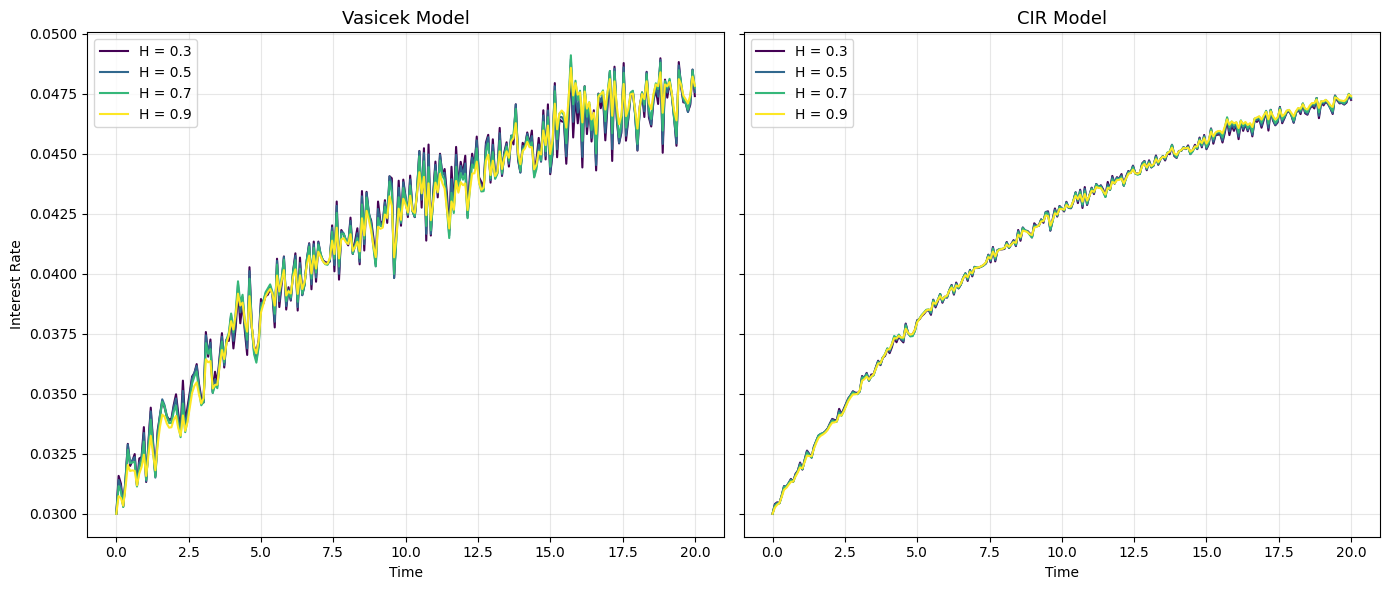

In [4]:
# === fBm Simulator using Davies-Harte method ===
class FBMSimulator:
    def __init__(self, n, T, H):
        self.n = n
        self.T = T
        self.H = H
        self.dt = T / n

    def generate_fbm_path(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
        n = self.n
        H = self.H
        r = np.zeros(2 * n)
        for k in range(2 * n):
            j = k if k <= n else 2 * n - k
            r[k] = 0.5 * (np.abs(j + 1)**(2*H) + np.abs(j - 1)**(2*H) - 2 * np.abs(j)**(2*H))
        r[0] = 1.0
        eigenvalues = np.real(fft(r))
        eigenvalues = np.maximum(eigenvalues, 0)
        Z = np.zeros(2 * n, dtype=complex)
        Z[0] = np.sqrt(eigenvalues[0]) * np.random.randn()
        if n % 2 == 0:
            Z[n] = np.sqrt(eigenvalues[n]) * np.random.randn()
        for k in range(1, n):
            real = np.random.randn()
            imag = np.random.randn()
            Z[k] = np.sqrt(eigenvalues[k] / 2) * (real + 1j * imag)
            Z[2*n - k] = np.sqrt(eigenvalues[k] / 2) * (real - 1j * imag)
        Y = ifft(Z)
        fbm_path = np.real(Y[:n+1])
        fbm_path -= fbm_path[0]
        return fbm_path

# === Vasicek Model Simulator ===
class VasicekModel:
    def __init__(self, alpha=0.1, mu=0.05, sigma=0.02, r0=0.03):
        self.alpha = alpha
        self.mu = mu
        self.sigma = sigma
        self.r0 = r0

    def simulate(self, fbm_path, dt):
        n = len(fbm_path) - 1
        r = np.zeros(n + 1)
        r[0] = self.r0
        for i in range(1, n + 1):
            dBH = fbm_path[i] - fbm_path[i-1]
            dr = self.alpha * (self.mu - r[i-1]) * dt + self.sigma * dBH
            r[i] = r[i-1] + dr
        return r

# === CIR Model Simulator ===
class CIRModel:
    def __init__(self, alpha=0.1, mu=0.05, sigma=0.02, r0=0.03):
        self.alpha = alpha
        self.mu = mu
        self.sigma = sigma
        self.r0 = r0

    def simulate(self, fbm_path, dt):
        n = len(fbm_path) - 1
        r = np.zeros(n + 1)
        r[0] = self.r0
        for i in range(1, n + 1):
            dBH = fbm_path[i] - fbm_path[i-1]
            sqrt_r = np.sqrt(np.maximum(r[i-1], 1e-10))
            dr = self.alpha * (self.mu - r[i-1]) * dt + self.sigma * sqrt_r * dBH
            r[i] = max(r[i-1] + dr, 1e-10)
        return r

# === Combined plotting function ===
def plot_vasicek_cir_comparison(H_values, n=252, T=20.0, seed=2024):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    colors = plt.cm.viridis(np.linspace(0, 1, len(H_values)))

    for idx, model_class in enumerate([VasicekModel, CIRModel]):
        ax = axes[idx]
        for i, H in enumerate(H_values):
            fbm_sim = FBMSimulator(n, T, H)
            fbm_path = fbm_sim.generate_fbm_path(seed=seed)
            t = np.linspace(0, T, n+1)
            dt = T / n
            model = model_class()
            r_path = model.simulate(fbm_path, dt)
            ax.plot(t, r_path, label=f'H = {H}', color=colors[i], linewidth=1.5)

        ax.set_title('Vasicek Model' if idx == 0 else 'CIR Model', fontsize=13)
        ax.set_xlabel('Time')
        ax.grid(True, alpha=0.3)
        if idx == 0:
            ax.set_ylabel('Interest Rate')
        ax.legend(fontsize=10)

    plt.tight_layout()
    return fig

# Execute and show the plot
H_values = [0.3, 0.5, 0.7, 0.9]
fig = plot_vasicek_cir_comparison(H_values)
plt.show()


Simulation w.r.t. fBm-Driven Vasicek and CIR Model: Impact of Mean-Reversion Speed $\alpha$

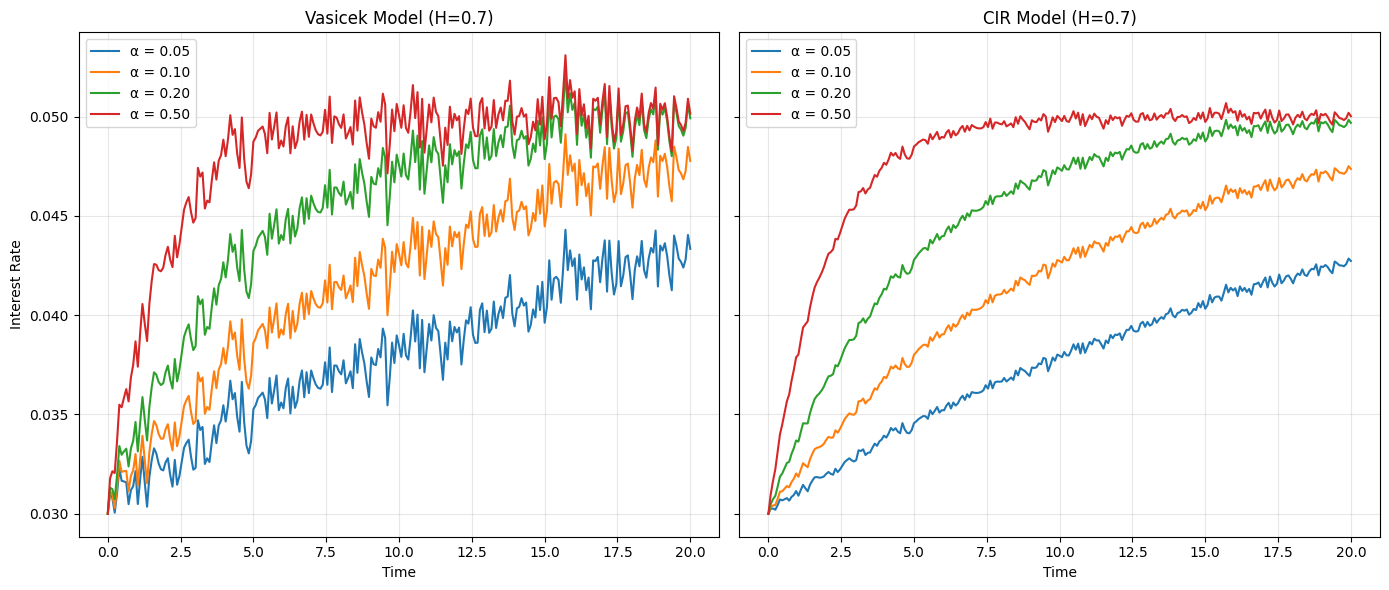

In [6]:
# === fBm Simulator using Davies-Harte method ===
class FBMSimulator:
    def __init__(self, n, T, H):
        self.n = n
        self.T = T
        self.H = H
        self.dt = T / n

    def generate_fbm_path(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
        n = self.n
        H = self.H
        r = np.zeros(2 * n)
        for k in range(2 * n):
            j = k if k <= n else 2 * n - k
            r[k] = 0.5 * (np.abs(j + 1)**(2*H) + np.abs(j - 1)**(2*H) - 2 * np.abs(j)**(2*H))
        r[0] = 1.0
        eigenvalues = np.real(fft(r))
        eigenvalues = np.maximum(eigenvalues, 0)
        Z = np.zeros(2 * n, dtype=complex)
        Z[0] = np.sqrt(eigenvalues[0]) * np.random.randn()
        if n % 2 == 0:
            Z[n] = np.sqrt(eigenvalues[n]) * np.random.randn()
        for k in range(1, n):
            real = np.random.randn()
            imag = np.random.randn()
            Z[k] = np.sqrt(eigenvalues[k] / 2) * (real + 1j * imag)
            Z[2*n - k] = np.sqrt(eigenvalues[k] / 2) * (real - 1j * imag)
        Y = ifft(Z)
        fbm_path = np.real(Y[:n+1])
        fbm_path -= fbm_path[0]
        return fbm_path

# === Vasicek Model ===
class VasicekModel:
    def __init__(self, alpha=0.1, mu=0.05, sigma=0.02, r0=0.03):
        self.alpha = alpha
        self.mu = mu
        self.sigma = sigma
        self.r0 = r0

    def simulate(self, fbm_path, dt):
        n = len(fbm_path) - 1
        r = np.zeros(n + 1)
        r[0] = self.r0
        for i in range(1, n + 1):
            dBH = fbm_path[i] - fbm_path[i-1]
            dr = self.alpha * (self.mu - r[i-1]) * dt + self.sigma * dBH
            r[i] = r[i-1] + dr
        return r

# === CIR Model ===
class CIRModel:
    def __init__(self, alpha=0.1, mu=0.05, sigma=0.02, r0=0.03):
        self.alpha = alpha
        self.mu = mu
        self.sigma = sigma
        self.r0 = r0

    def simulate(self, fbm_path, dt):
        n = len(fbm_path) - 1
        r = np.zeros(n + 1)
        r[0] = self.r0
        for i in range(1, n + 1):
            dBH = fbm_path[i] - fbm_path[i-1]
            sqrt_r = np.sqrt(np.maximum(r[i-1], 1e-10))
            dr = self.alpha * (self.mu - r[i-1]) * dt + self.sigma * sqrt_r * dBH
            r[i] = max(r[i-1] + dr, 1e-10)
        return r

# === Simulation Function ===
def simulate_model_paths(model_class, alpha_values, H, n=252, T=20.0, seed=2024):
    t = np.linspace(0, T, n+1)
    dt = T / n
    fbm_sim = FBMSimulator(n, T, H)
    fbm_path = fbm_sim.generate_fbm_path(seed=seed)
    
    paths = {}
    for alpha in alpha_values:
        model = model_class(alpha=alpha, mu=0.05, sigma=0.02, r0=0.03)
        r_path = model.simulate(fbm_path, dt)
        paths[alpha] = r_path
    return t, paths

# === Plotting in 1 row 2 columns ===
alpha_values = [0.05, 0.1, 0.2, 0.5]
H = 0.7

t, vasicek_paths = simulate_model_paths(VasicekModel, alpha_values, H=H)
t, cir_paths = simulate_model_paths(CIRModel, alpha_values, H=H)

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Vasicek subplot
for alpha, r_path in vasicek_paths.items():
    axs[0].plot(t, r_path, label=f'α = {alpha:.2f}', linewidth=1.5)
axs[0].set_title(f'Vasicek Model (H={H})')
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Interest Rate")
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# CIR subplot
for alpha, r_path in cir_paths.items():
    axs[1].plot(t, r_path, label=f'α = {alpha:.2f}', linewidth=1.5)
axs[1].set_title(f'CIR Model (H={H})')
axs[1].set_xlabel("Time")
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
